In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar hojas del archivo Excel
idf_xls = pd.ExcelFile('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx')

print("Hojas en IDF:", idf_xls.sheet_names)


Hojas en IDF: ['Nota aclaratoria', 'Municipios 2023', 'Departamentos 2023']


In [ ]:
# Cargar ignorando las primeras filas innecesarias
df_idf1 = pd.read_excel('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx', sheet_name='Municipios 2023', skiprows=6)
df_idf2 = pd.read_excel('/content/ResultadosIDF_Nueva_MetodologIa_2023_Act.xlsx', sheet_name='Departamentos 2023', skiprows=6)

# Verificar el DataFrame
print(df_idf1.head())
print(df_idf2.head())


   Código Departamento   Municipio Categorías Dotaciones Iniciales  \
0    5001    ANTIOQUIA    MEDELLÍN          E                    C   
1    5002    ANTIOQUIA   ABEJORRAL          6                   G4   
2    5004    ANTIOQUIA    ABRIAQUÍ          6                   G3   
3    5021    ANTIOQUIA  ALEJANDRÍA          6                   G2   
4    5030    ANTIOQUIA       AMAGÁ          5                   G2   

   Ciudad capital Dependencia de las Transferencias  \
0               1                         29.074403   
1               0                         66.571675   
2               0                          51.89963   
3               0                         43.667166   
4               0                         44.470967   

   Calificación Dependencia de las Transferencias Relevancia FBK fijo  \
0                                       70.925597           18.508373   
1                                       33.428325           29.330906   
2                            

In [ ]:
df_icfes = pd.read_excel('/content/Cuadros_salida_saber_11_2023.xlsx', sheet_name='Clasif_planteles', skiprows=7)


In [ ]:
# Cargar archivos en Pandas
df_poblacion = pd.read_csv('/content/Proyección de la población de Cundinamarca para 2023 - Colombia (1).csv')
df_educacion = pd.read_csv('/content/MEN_ESTADISTICAS_EN_EDUCACION_EN_PREESCOLAR__B_SICA_Y_MEDIA_POR_MUNICIPIO_20250222.csv')
df_internet = pd.read_csv('/content/Internet_Fijo_Penetraci_n_Municipio_20250222.csv')

In [ ]:
df_icfes

,PERIODO,DEPARTAMENTO,MUNICIPIO,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,INDICE PSC,INDICE PCN,INDICE PIN,INDICE TOTAL
0,2021,ANTIOQUIA,Medellín,105001000621,11.0,380.0,380.0,A,0.771594,0.74582,0.720166,0.707182,0.710565,0.734219
1,2021,ANTIOQUIA,Medellín,105001000931,11.0,582.0,561.0,B,0.753204,0.712837,0.700051,0.687036,0.678475,0.710605
2,2021,ANTIOQUIA,Medellín,105001001155,11.0,257.0,251.0,C,0.697166,0.656992,0.622678,0.630008,0.617135,0.649051
3,2021,ANTIOQUIA,Medellín,105001002020,11.0,306.0,305.0,B,0.740248,0.700878,0.693203,0.672875,0.677431,0.699926
4,2021,ANTIOQUIA,Medellín,105001003255,11.0,181.0,176.0,D,0.666039,0.631395,0.583099,0.60735,0.555748,0.616877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44696,2023,CESAR,VALLEDUPAR,320001800501,26.0,2.0,1.0,SC,,,,,,
44697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44699,Nota:\n1. INDICE PLC: Corresponde al índice ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_icfes['GRADO'] = df_icfes['GRADO'].astype('category')
df_icfes['PERIODO'] = df_icfes['PERIODO'].astype('category')
df_icfes['CLASIFICACION'] = df_icfes['CLASIFICACION'].astype('category')
df_icfes['CODIGO PLANTEL EDUCATIVO'] = df_icfes['CODIGO PLANTEL EDUCATIVO'].astype('string')
df_icfes['INDICE PLC'] = pd.to_numeric(df_icfes['INDICE PLC'], errors='coerce')
df_icfes['INDICE PMA'] = pd.to_numeric(df_icfes['INDICE PMA'], errors='coerce')
df_icfes['INDICE PSC'] = pd.to_numeric(df_icfes['INDICE PSC'], errors='coerce')
df_icfes['INDICE PCN'] = pd.to_numeric(df_icfes['INDICE PCN'], errors='coerce')
df_icfes['INDICE PIN'] = pd.to_numeric(df_icfes['INDICE PIN'], errors='coerce')
df_icfes['INDICE TOTAL'] = pd.to_numeric(df_icfes['INDICE TOTAL'], errors='coerce')

print(df_icfes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44701 entries, 0 to 44700
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   PERIODO                   44699 non-null  category
 1   DEPARTAMENTO              44696 non-null  object  
 2   MUNICIPIO                 44696 non-null  object  
 3   CODIGO PLANTEL EDUCATIVO  44697 non-null  string  
 4   GRADO                     44697 non-null  category
 5   TOTAL INSCRITOS           44697 non-null  float64 
 6   TOTAL EVALUADOS           44676 non-null  float64 
 7   CLASIFICACION             44697 non-null  category
 8   INDICE PLC                40821 non-null  float64 
 9   INDICE PMA                40821 non-null  float64 
 10  INDICE PSC                40821 non-null  float64 
 11  INDICE PCN                40821 non-null  float64 
 12  INDICE PIN                40656 non-null  float64 
 13  INDICE TOTAL              40821 non-null  floa

In [ ]:
print(df_idf1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 32 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Código                                                        1102 non-null   int64  
 1   Departamento                                                  1102 non-null   object 
 2   Municipio                                                     1102 non-null   object 
 3   Categorías                                                    1102 non-null   object 
 4   Dotaciones Iniciales                                          1102 non-null   object 
 5   Ciudad capital                                                1102 non-null   int64  
 6   Dependencia de las Transferencias                             1102 non-null   object 
 7   Calificación Dependencia de las Transferencias                1102 no

In [ ]:
df_idf1 = df_idf1[['Municipio', 'Departamento']]

In [ ]:
print(df_idf1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Municipio     1102 non-null   object
 1   Departamento  1102 non-null   object
dtypes: object(2)
memory usage: 17.3+ KB
None


In [ ]:
df_idf2.columns

Index(['Código', 'Departamento', 'Categorías',
       'Dependencia de las Transferencias',
       'Calificación Dependencia de las Transferencias', 'Relevancia FBK fijo',
       'Calificación Relevancia FBK fijo', 'Endeudamiento (Total)',
       'Calificación Endeudamiento Total', 'Ahorro Corriente',
       'Calificación Ahorro Corriente', 'Balance Primario',
       'Calificación Balance Primario', 'Resultados',
       'Calificación Resultados ', 'Holgura', 'Calificación Holgura',
       'Capacidad de programación y recaudo de ingresos ',
       'Calificación capacidad de programación y recaudo de Ingresos',
       'Capacidad de Ejecución de Inversión ',
       'Calificación Capacidad de Ejecución de Inversión',
       'Bonificación Esfuerzo Propio', 'Resultados Gestión', 'Gestión +Bonos',
       'Calificación Resultados Gestión', 'Nuevo IDF (sin bonos)', 'Nuevo IDF',
       'Rango '],
      dtype='object')

In [ ]:
df_poblacion.columns

Index(['Municipio', 'Mujeres', 'Hombres', 'Total'], dtype='object')

In [ ]:
df_educacion.columns

Index(['AÑO', 'CÓDIGO_MUNICIPIO', 'MUNICIPIO', 'CÓDIGO_DEPARTAMENTO',
       'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
   

In [ ]:
df_icfes.columns

Index(['PERIODO', 'DEPARTAMENTO', 'MUNICIPIO', 'CODIGO PLANTEL EDUCATIVO',
       'GRADO', 'TOTAL INSCRITOS', 'TOTAL EVALUADOS', 'CLASIFICACION',
       'INDICE PLC', 'INDICE PMA', 'INDICE PSC', 'INDICE PCN', 'INDICE PIN',
       'INDICE TOTAL'],
      dtype='object')

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   AÑO                           35578 non-null  int64 
 1   TRIMESTRE                     35578 non-null  int64 
 2   COD_DEPARTAMENTO              35578 non-null  int64 
 3   DEPARTAMENTO                  35578 non-null  object
 4   COD_MUNICIPIO                 35578 non-null  int64 
 5   MUNICIPIO                     35578 non-null  object
 6   No. ACCESOS FIJOS A INTERNET  35578 non-null  int64 
 7   POBLACIÓN DANE                35578 non-null  int64 
 8   INDICE                        35578 non-null  object
dtypes: int64(6), object(3)
memory usage: 2.4+ MB


In [ ]:
df_internet

,AÑO,TRIMESTRE,COD_DEPARTAMENTO,DEPARTAMENTO,COD_MUNICIPIO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE,INDICE
0,2016,1,50,META,50606,RESTREPO,490,17648,"2,78"
1,2016,2,15,BOYACÁ,15518,PAJARITO,43,2395,"1,80"
2,2020,3,25,CUNDINAMARCA,25489,NIMAIMA,43,3808,"1,13"
3,2020,3,73,TOLIMA,73030,AMBALEMA,38,6752,"0,56"
4,2017,1,5,ANTIOQUIA,5690,SANTO DOMINGO,337,12426,"2,71"
...,...,...,...,...,...,...,...,...,...
35573,2016,4,66,RISARALDA,66682,SANTA ROSA DE CABAL,9460,77296,"12,24"
35574,2020,3,25,CUNDINAMARCA,25286,FUNZA,23052,101420,"22,73"
35575,2018,2,5,ANTIOQUIA,5091,BETANIA,512,10323,"4,96"
35576,2020,4,15,BOYACÁ,15673,SAN MATEO,36,3422,"1,05"


In [ ]:
df_internet = df_internet[["AÑO", "DEPARTAMENTO", "MUNICIPIO", "No. ACCESOS FIJOS A INTERNET", "POBLACIÓN DANE"]]

In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   AÑO                           35578 non-null  int64 
 1   DEPARTAMENTO                  35578 non-null  object
 2   MUNICIPIO                     35578 non-null  object
 3   No. ACCESOS FIJOS A INTERNET  35578 non-null  int64 
 4   POBLACIÓN DANE                35578 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [ ]:
df_internet['AÑO'] = df_internet['AÑO'].astype('category')

<ipython-input-19-b7541305d0ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_internet['AÑO'] = df_internet['AÑO'].astype('category')


In [ ]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35578 entries, 0 to 35577
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   AÑO                           35578 non-null  category
 1   DEPARTAMENTO                  35578 non-null  object  
 2   MUNICIPIO                     35578 non-null  object  
 3   No. ACCESOS FIJOS A INTERNET  35578 non-null  int64   
 4   POBLACIÓN DANE                35578 non-null  int64   
dtypes: category(1), int64(2), object(2)
memory usage: 1.1+ MB


In [ ]:
df_poblacion

,Municipio,Mujeres,Hombres,Total
0,Agua de Dios,7077,6561,13638
1,Albán,3640,3854,7494
2,Anapoima,8669,8492,17161
3,Anolaima,7813,8246,16059
4,Apulo,4669,4892,9561
...,...,...,...,...
112,Viotá,7378,7877,15255
113,Yacopí,6740,7255,13995
114,Zipacón,2674,2771,5445
115,Zipaquirá,80189,75429,155618


In [ ]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  117 non-null    object
 1   Mujeres    117 non-null    int64 
 2   Hombres    117 non-null    int64 
 3   Total      117 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


In [ ]:
df_educacion.columns

Index(['AÑO', 'CÓDIGO_MUNICIPIO', 'MUNICIPIO', 'CÓDIGO_DEPARTAMENTO',
       'DEPARTAMENTO', 'CÓDIGO_ETC', 'ETC', 'POBLACIÓN_5_16',
       'TASA_MATRICULACIÓN_5_16', 'COBERTURA_NETA',
       'COBERTURA_NETA_TRANSICIÓN', 'COBERTURA_NETA_PRIMARIA',
       'COBERTURA_NETA_SECUNDARIA', 'COBERTURA_NETA_MEDIA', 'COBERTURA_BRUTA',
       'COBERTURA_BRUTA_TRANSICIÓN', 'COBERTURA_BRUTA_PRIMARIA',
       'COBERTURA_BRUTA_SECUNDARIA', 'COBERTURA_BRUTA_MEDIA',
       'TAMAÑO_PROMEDIO_DE_GRUPO', 'SEDES_CONECTADAS_A_INTERNET', 'DESERCIÓN',
       'DESERCIÓN_TRANSICIÓN', 'DESERCIÓN_PRIMARIA', 'DESERCIÓN_SECUNDARIA',
       'DESERCIÓN_MEDIA', 'APROBACIÓN', 'APROBACIÓN_TRANSICIÓN',
       'APROBACIÓN_PRIMARIA', 'APROBACIÓN_SECUNDARIA', 'APROBACIÓN_MEDIA',
       'REPROBACIÓN', 'REPROBACIÓN_TRANSICIÓN', 'REPROBACIÓN_PRIMARIA',
       'REPROBACIÓN_SECUNDARIA', 'REPROBACIÓN_MEDIA', 'REPITENCIA',
       'REPITENCIA_TRANSICIÓN', 'REPITENCIA_PRIMARIA', 'REPITENCIA_SECUNDARIA',
       'REPITENCIA_MEDIA'],
   

In [ ]:
df_educacion=df_educacion[["AÑO", "DEPARTAMENTO", "MUNICIPIO", "TASA_MATRICULACIÓN_5_16", "COBERTURA_NETA", "COBERTURA_BRUTA",  "DESERCIÓN", "APROBACIÓN", "REPROBACIÓN", "REPITENCIA"]]

In [ ]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AÑO                      14585 non-null  int64  
 1   DEPARTAMENTO             14585 non-null  object 
 2   MUNICIPIO                14585 non-null  object 
 3   TASA_MATRICULACIÓN_5_16  14470 non-null  float64
 4   COBERTURA_NETA           14474 non-null  float64
 5   COBERTURA_BRUTA          14517 non-null  float64
 6   DESERCIÓN                14443 non-null  float64
 7   APROBACIÓN               14560 non-null  float64
 8   REPROBACIÓN              14499 non-null  float64
 9   REPITENCIA               14442 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 1.1+ MB


In [ ]:
df_educacion["AÑO"]=df_educacion["AÑO"].astype("category")

In [ ]:
df_educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14585 entries, 0 to 14584
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   AÑO                      14585 non-null  category
 1   DEPARTAMENTO             14585 non-null  object  
 2   MUNICIPIO                14585 non-null  object  
 3   TASA_MATRICULACIÓN_5_16  14470 non-null  float64 
 4   COBERTURA_NETA           14474 non-null  float64 
 5   COBERTURA_BRUTA          14517 non-null  float64 
 6   DESERCIÓN                14443 non-null  float64 
 7   APROBACIÓN               14560 non-null  float64 
 8   REPROBACIÓN              14499 non-null  float64 
 9   REPITENCIA               14442 non-null  float64 
dtypes: category(1), float64(7), object(2)
memory usage: 1.0+ MB


In [ ]:
def check_nulls(df):
  print(df.isnull().sum())

check_nulls(df_idf1)
check_nulls(df_idf2)
check_nulls(df_icfes)
check_nulls(df_poblacion)
check_nulls(df_educacion)
check_nulls(df_internet)


Municipio       0
Departamento    0
dtype: int64
Código                                                          0
Departamento                                                    0
Categorías                                                      0
Dependencia de las Transferencias                               0
Calificación Dependencia de las Transferencias                  0
Relevancia FBK fijo                                             0
Calificación Relevancia FBK fijo                                0
Endeudamiento (Total)                                           0
Calificación Endeudamiento Total                                0
Ahorro Corriente                                                0
Calificación Ahorro Corriente                                   0
Balance Primario                                                0
Calificación Balance Primario                                   0
Resultados                                                      0
Calificación Resultados    

In [ ]:
df_idf1 = df_idf1[df_idf1['Departamento'] == 'CUNDINAMARCA']
df_idf1.head()

,Municipio,Departamento
458,AGUA DE DIOS,CUNDINAMARCA
459,ALBÁN,CUNDINAMARCA
460,ANAPOIMA,CUNDINAMARCA
461,ANOLAIMA,CUNDINAMARCA
462,ARBELÁEZ,CUNDINAMARCA


In [ ]:
print(df_idf1['Municipio'].unique())

distinct_count = df_idf1['Municipio'].nunique()

total_count = df_idf1['Municipio'].count()

if distinct_count == total_count:
    print("No hay valores repetidos en la columna 'municipios'")
else:
    print("Hay valores repetidos en la columna 'municipios'")


['AGUA DE DIOS' 'ALBÁN' 'ANAPOIMA' 'ANOLAIMA' 'ARBELÁEZ' 'BELTRÁN'
 'BITUIMA' 'BOJACÁ' 'CABRERA ' 'CACHIPAY' 'CAJICA' 'CAPARRAPÍ' 'CÁQUEZA'
 'CARMEN DE CARUPA' 'CHAGUANÍ' 'CHIA' 'CHIPAQUE' 'CHOACHÍ' 'CHOCONTÁ'
 'COGUA' 'COTA' 'CUCUNUBÁ' 'MESITAS DEL COLEGIO' 'EL PEÑÓN ' 'EL ROSAL'
 'FACATATIVÁ' 'FÓMEQUE' 'FOSCA' 'FUNZA' 'FÚQUENE' 'FUSAGASUGÁ' 'GACHALÁ'
 'GACHANCIPÁ' 'GACHETÁ' 'GAMA' 'GIRARDOT' 'GRANADA ' 'GUACHETÁ' 'GUADUAS'
 'GUASCA' 'GUATAQUÍ' 'GUATAVITA' 'GUAYABAL DE SÍQUIMA' 'GUAYABETAL'
 'GUTIÉRREZ' 'JERUSALÉN' 'JUNÍN' 'LA CALERA' 'LA MESA' 'LA PALMA'
 'LA PEÑA' 'LA VEGA ' 'LENGUAZAQUE' 'MACHETÁ' 'MADRID ' 'MANTA' 'MEDINA'
 'MOSQUERA ' 'NARIÑO ' 'NEMOCÓN' 'NILO' 'NIMAIMA' 'NOCAIMA' 'VENECIA '
 'PACHO' 'PAIME' 'PANDI' 'PARATEBUENO' 'PASCA' 'PUERTO SALGAR' 'PULÍ'
 'QUEBRADANEGRA' 'QUETAME' 'QUIPILE' 'APULO ' 'RICAURTE '
 'SAN ANTONIO DEL TEQUENDAMA' 'SAN BERNARDO ' 'SAN CAYETANO '
 'SAN FRANCISCO ' 'SAN JUAN DE RIO SECO' 'SASAIMA' 'SESQUILÉ' 'SIBATÉ'
 'SILVANIA' 'SIMIJACA' 'SOACHA' 

In [ ]:
df_idf1

,Municipio,Departamento
458,AGUA DE DIOS,CUNDINAMARCA
459,ALBÁN,CUNDINAMARCA
460,ANAPOIMA,CUNDINAMARCA
461,ANOLAIMA,CUNDINAMARCA
462,ARBELÁEZ,CUNDINAMARCA
...,...,...
569,VILLETA,CUNDINAMARCA
570,VIOTÁ,CUNDINAMARCA
571,YACOPÍ,CUNDINAMARCA
572,ZIPACÓN,CUNDINAMARCA


In [ ]:
municipios_validos = df_idf1['Municipio'].astype(str).str.upper().str.strip().unique()

In [ ]:
def convert_columns_to_lowercase(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna('').astype(str).str.lower()
  return df

df_idf1 = convert_columns_to_lowercase(df_idf1)
df_idf2 = convert_columns_to_lowercase(df_idf2)
df_poblacion = convert_columns_to_lowercase(df_poblacion)
df_educacion = convert_columns_to_lowercase(df_educacion)
df_icfes = convert_columns_to_lowercase(df_icfes)
df_internet = convert_columns_to_lowercase(df_internet)
# Remove the line below as df_idf1_unique_municipios is not defined
# df_idf1_unique_municipios = convert_columns_to_lowercase(df_idf1_unique_municipios)

print("\nDataFrame df_idf1 después de convertir a minúsculas:")
print(df_idf1.head())

print("\nDataFrame df_poblacion después de convertir a minúsculas:")
print(df_poblacion.head())



DataFrame df_idf1 después de convertir a minúsculas:
        Municipio  Departamento
458  agua de dios  cundinamarca
459         albán  cundinamarca
460      anapoima  cundinamarca
461      anolaima  cundinamarca
462      arbeláez  cundinamarca

DataFrame df_poblacion después de convertir a minúsculas:
      Municipio  Mujeres  Hombres  Total
0  agua de dios     7077     6561  13638
1         albán     3640     3854   7494
2      anapoima     8669     8492  17161
3      anolaima     7813     8246  16059
4         apulo     4669     4892   9561


<ipython-input-33-5be97dfda440>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('').astype(str).str.lower()
<ipython-input-33-5be97dfda440>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('').astype(str).str.lower()


In [ ]:
def estandarizar_municipio(df, posibles_nombres, nombre_df):
    for nombre_col in posibles_nombres:
        if nombre_col in df.columns:
            nombre_col = nombre_col.lower()
            df = df.rename(columns={nombre_col: 'Municipio'})
            break
    if 'Municipio' not in df.columns:
        print(f"[ERROR] No se encontró columna de municipio en {nombre_df}")
        return pd.DataFrame()
    df['Municipio'] = df['Municipio'].astype(str).str.upper().str.strip()
    df = df[df['Municipio'].isin(municipios_validos)].copy()
    return df


In [ ]:
df_icfes

,PERIODO,DEPARTAMENTO,MUNICIPIO,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,INDICE PSC,INDICE PCN,INDICE PIN,INDICE TOTAL
0,2021,antioquia,medellín,105001000621,11.0,380.0,380.0,A,0.771594,0.745820,0.720166,0.707182,0.710565,0.734219
1,2021,antioquia,medellín,105001000931,11.0,582.0,561.0,B,0.753204,0.712837,0.700051,0.687036,0.678475,0.710605
2,2021,antioquia,medellín,105001001155,11.0,257.0,251.0,C,0.697166,0.656992,0.622678,0.630008,0.617135,0.649051
3,2021,antioquia,medellín,105001002020,11.0,306.0,305.0,B,0.740248,0.700878,0.693203,0.672875,0.677431,0.699926
4,2021,antioquia,medellín,105001003255,11.0,181.0,176.0,D,0.666039,0.631395,0.583099,0.607350,0.555748,0.616877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44696,2023,cesar,valledupar,320001800501,26.0,2.0,1.0,SC,NaN,NaN,NaN,NaN,NaN,NaN
44697,NaN,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44698,NaN,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44699,Nota:\n1. INDICE PLC: Corresponde al índice ca...,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_internet

,AÑO,DEPARTAMENTO,MUNICIPIO,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE
0,2016,meta,restrepo,490,17648
1,2016,boyacá,pajarito,43,2395
2,2020,cundinamarca,nimaima,43,3808
3,2020,tolima,ambalema,38,6752
4,2017,antioquia,santo domingo,337,12426
...,...,...,...,...,...
35573,2016,risaralda,santa rosa de cabal,9460,77296
35574,2020,cundinamarca,funza,23052,101420
35575,2018,antioquia,betania,512,10323
35576,2020,boyacá,san mateo,36,3422


In [ ]:
df_icfes = df_icfes.rename(columns={'MUNICIPIO': 'Municipio'})
df_educacion = df_educacion.rename(columns={'MUNICIPIO': 'Municipio'})
df_poblacion = df_poblacion.rename(columns={'Municipio': 'Municipio'})
df_internet = df_internet.rename(columns={'MUNICIPIO': 'Municipio'})


In [ ]:
def lowercase_municipio(df):
  if 'Municipio' in df.columns:
    df['Municipio'] = df['Municipio'].astype(str).str.lower()
  return df


df_idf1 = lowercase_municipio(df_idf1)
df_idf2 = lowercase_municipio(df_idf2)
df_poblacion = lowercase_municipio(df_poblacion)
df_educacion = lowercase_municipio(df_educacion)
df_icfes = lowercase_municipio(df_icfes)
df_internet = lowercase_municipio(df_internet)


In [ ]:
df_icfes

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,INDICE PSC,INDICE PCN,INDICE PIN,INDICE TOTAL
0,2021,antioquia,medellín,105001000621,11.0,380.0,380.0,A,0.771594,0.745820,0.720166,0.707182,0.710565,0.734219
1,2021,antioquia,medellín,105001000931,11.0,582.0,561.0,B,0.753204,0.712837,0.700051,0.687036,0.678475,0.710605
2,2021,antioquia,medellín,105001001155,11.0,257.0,251.0,C,0.697166,0.656992,0.622678,0.630008,0.617135,0.649051
3,2021,antioquia,medellín,105001002020,11.0,306.0,305.0,B,0.740248,0.700878,0.693203,0.672875,0.677431,0.699926
4,2021,antioquia,medellín,105001003255,11.0,181.0,176.0,D,0.666039,0.631395,0.583099,0.607350,0.555748,0.616877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44696,2023,cesar,valledupar,320001800501,26.0,2.0,1.0,SC,NaN,NaN,NaN,NaN,NaN,NaN
44697,NaN,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44698,NaN,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44699,Nota:\n1. INDICE PLC: Corresponde al índice ca...,,,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f"Filas en df_icfes antes de estandarizar: {df_icfes.shape[0]}")
df_icfes = estandarizar_municipio(df_icfes, ['Municipio', 'MUNICIPIO'], "df_icfes")
print(f"Filas en df_icfes después de estandarizar: {df_icfes.shape[0]}")

Filas en df_icfes antes de estandarizar: 44701
Filas en df_icfes después de estandarizar: 3385


In [ ]:
df_icfes      = estandarizar_municipio(df_icfes,      ['Municipio', 'MUNICIPIO'], "df_icfes")
df_internet   = estandarizar_municipio(df_internet,   ['Municipio', 'MUNICIPIO'], "df_internet")
df_educacion  = estandarizar_municipio(df_educacion,  ['Municipio', 'MUNICIPIO'], "df_educacion")
df_poblacion  = estandarizar_municipio(df_poblacion,  ['Municipio', 'MUNICIPIO'], "df_poblacion")

In [ ]:
df_icfes

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,INDICE PSC,INDICE PCN,INDICE PIN,INDICE TOTAL
87,2021,antioquia,GRANADA,105313000016,11.0,271.0,267.0,B,0.708904,0.711411,0.641873,0.652348,0.618718,0.674025
88,2021,antioquia,GRANADA,205313000215,11.0,13.0,12.0,D,0.587412,0.633940,0.559144,0.568190,0.498274,0.580333
89,2021,antioquia,GRANADA,205313000517,11.0,30.0,30.0,C,0.701277,0.705358,0.617326,0.632426,0.535714,0.654221
110,2021,antioquia,NARIÑO,105483000347,11.0,84.0,81.0,C,0.678442,0.633899,0.647682,0.642313,0.567074,0.644160
111,2021,antioquia,NARIÑO,205483000392,11.0,3.0,3.0,SC,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,2023,cundinamarca,SILVANIA,325743001083,26.0,50.0,47.0,D,0.610700,0.580100,0.563100,0.563300,0.557600,0.577600
44682,2023,cundinamarca,GIRARDOT,325307800051,26.0,14.0,13.0,D,0.625200,0.556600,0.544300,0.566400,0.565100,0.572500
44684,2023,cundinamarca,FÓMEQUE,225279000040,26.0,7.0,7.0,SC,NaN,NaN,NaN,NaN,NaN,NaN
44686,2023,cundinamarca,FOSCA,125281000303,26.0,21.0,18.0,D,0.530800,0.496800,0.471000,0.526400,0.529400,0.508000


In [ ]:
df_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111 entries, 0 to 115
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  111 non-null    object
 1   Mujeres    111 non-null    int64 
 2   Hombres    111 non-null    int64 
 3   Total      111 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 4.3+ KB


In [ ]:
df_educacion

,AÑO,DEPARTAMENTO,Municipio,TASA_MATRICULACIÓN_5_16,COBERTURA_NETA,COBERTURA_BRUTA,DESERCIÓN,APROBACIÓN,REPROBACIÓN,REPITENCIA
52,2023,antioquia,GRANADA,78.20,78.20,84.02,4.31,90.76,4.93,8.29
72,2023,antioquia,NARIÑO,65.08,65.08,69.53,3.50,89.90,6.60,10.17
90,2023,antioquia,SAN FRANCISCO,82.61,82.61,89.96,3.02,86.26,10.71,11.90
118,2023,antioquia,VENECIA,83.74,83.74,95.01,3.64,86.67,9.69,12.44
163,2023,bolívar,EL PEÑÓN,83.55,83.55,92.30,3.76,90.14,6.10,12.21
...,...,...,...,...,...,...,...,...,...,...
14228,2022,nariño,RICAURTE,70.09,70.09,81.07,2.98,87.11,9.91,23.32
14232,2022,nariño,SAN BERNARDO,70.71,70.71,76.41,2.02,90.35,7.63,9.12
14276,2022,norte de santander,SAN CAYETANO,90.41,90.41,99.75,5.29,85.46,9.25,6.30
14337,2022,santander,EL PEÑÓN,64.28,64.28,70.41,3.37,89.65,6.98,3.36


In [ ]:
def promedios_por_municipio(df, nombre_df):
    import pandas as pd

    if df.empty:
        print(f"[ADVERTENCIA] {nombre_df} está vacío luego del filtrado.")
        return pd.DataFrame()

    if 'Municipio' not in df.columns:
        print(f"[ERROR] {nombre_df} no contiene la columna 'Municipio'.")
        return pd.DataFrame()

    columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()
    columnas_numericas = [col for col in columnas_numericas if col != 'Municipio']

    if not columnas_numericas:
        print(f"[ADVERTENCIA] {nombre_df} no contiene columnas numéricas (int o float) para promediar.")
        return pd.DataFrame()

    tipos_originales = df[columnas_numericas].dtypes.to_dict()

    promedios = df.groupby('Municipio')[columnas_numericas].mean().reset_index()

    for col, tipo in tipos_originales.items():
        if pd.api.types.is_integer_dtype(tipo):
            promedios[col] = promedios[col].round().astype('int')

    return promedios


In [ ]:
prom_internet  = promedios_por_municipio(df_internet, "df_internet")
prom_educacion = promedios_por_municipio(df_educacion, "df_educacion")
prom_poblacion = promedios_por_municipio(df_poblacion, "df_poblacion")
prom_icfes     = promedios_por_municipio(df_icfes, "df_icfes")

In [ ]:
prom_internet

,Municipio,No. ACCESOS FIJOS A INTERNET,POBLACIÓN DANE
0,AGUA DE DIOS,842,12170
1,ALBÁN,304,8241
2,ANAPOIMA,1198,15173
3,ANOLAIMA,609,14376
4,APULO,445,8527
...,...,...,...
101,VIOTÁ,441,13761
102,YACOPÍ,134,12782
103,ZIPACÓN,60,4862
104,ZIPAQUIRÁ,26371,136724


In [ ]:
prom_poblacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Municipio  111 non-null    object
 1   Mujeres    111 non-null    int64 
 2   Hombres    111 non-null    int64 
 3   Total      111 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.6+ KB


In [ ]:
prom_poblacion

,Municipio,Mujeres,Hombres,Total
0,AGUA DE DIOS,7077,6561,13638
1,ALBÁN,3640,3854,7494
2,ANAPOIMA,8669,8492,17161
3,ANOLAIMA,7813,8246,16059
4,APULO,4669,4892,9561
...,...,...,...,...
106,VIOTÁ,7378,7877,15255
107,YACOPÍ,6740,7255,13995
108,ZIPACÓN,2674,2771,5445
109,ZIPAQUIRÁ,80189,75429,155618


In [ ]:
df_idf1

,Municipio,Departamento
458,agua de dios,cundinamarca
459,albán,cundinamarca
460,anapoima,cundinamarca
461,anolaima,cundinamarca
462,arbeláez,cundinamarca
...,...,...
569,villeta,cundinamarca
570,viotá,cundinamarca
571,yacopí,cundinamarca
572,zipacón,cundinamarca


In [ ]:
cols_internet = [col for col in prom_internet.columns.tolist() if col != 'Municipio']
cols_educacion = [col for col in prom_educacion.columns.tolist() if col != 'Municipio']
cols_poblacion = [col for col in prom_poblacion.columns.tolist() if col != 'Municipio']

all_new_cols = list(set(cols_internet + cols_educacion+ cols_poblacion))

for col in all_new_cols:
    if col not in df_icfes.columns:
        df_icfes[col] = None



In [ ]:
df_icfes

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,...,No. ACCESOS FIJOS A INTERNET,COBERTURA_BRUTA,Total,COBERTURA_NETA,Mujeres,Hombres,DESERCIÓN,REPROBACIÓN,REPITENCIA,APROBACIÓN
87,2021,antioquia,GRANADA,105313000016,11.0,271.0,267.0,B,0.708904,0.711411,...,None,None,None,None,None,None,None,None,None,None
88,2021,antioquia,GRANADA,205313000215,11.0,13.0,12.0,D,0.587412,0.633940,...,None,None,None,None,None,None,None,None,None,None
89,2021,antioquia,GRANADA,205313000517,11.0,30.0,30.0,C,0.701277,0.705358,...,None,None,None,None,None,None,None,None,None,None
110,2021,antioquia,NARIÑO,105483000347,11.0,84.0,81.0,C,0.678442,0.633899,...,None,None,None,None,None,None,None,None,None,None
111,2021,antioquia,NARIÑO,205483000392,11.0,3.0,3.0,SC,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,2023,cundinamarca,SILVANIA,325743001083,26.0,50.0,47.0,D,0.610700,0.580100,...,None,None,None,None,None,None,None,None,None,None
44682,2023,cundinamarca,GIRARDOT,325307800051,26.0,14.0,13.0,D,0.625200,0.556600,...,None,None,None,None,None,None,None,None,None,None
44684,2023,cundinamarca,FÓMEQUE,225279000040,26.0,7.0,7.0,SC,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None
44686,2023,cundinamarca,FOSCA,125281000303,26.0,21.0,18.0,D,0.530800,0.496800,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_icfes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3385 entries, 87 to 44693
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PERIODO                       3385 non-null   category
 1   DEPARTAMENTO                  3385 non-null   object  
 2   Municipio                     3385 non-null   object  
 3   CODIGO PLANTEL EDUCATIVO      3385 non-null   string  
 4   GRADO                         3385 non-null   category
 5   TOTAL INSCRITOS               3385 non-null   float64 
 6   TOTAL EVALUADOS               3383 non-null   float64 
 7   CLASIFICACION                 3385 non-null   category
 8   INDICE PLC                    2973 non-null   float64 
 9   INDICE PMA                    2973 non-null   float64 
 10  INDICE PSC                    2973 non-null   float64 
 11  INDICE PCN                    2973 non-null   float64 
 12  INDICE PIN                    2969 non-null   float

In [ ]:
int_cols = ["Mujeres", "Total", "Hombres", "POBLACIÓN DANE", "No. ACCESOS FIJOS A INTERNET"]

float_cols = ["REPITENCIA", "REPROBACIÓN", "COBERTURA_BRUTA", "TASA_MATRICULACIÓN_5_16", "APROBACIÓN", "COBERTURA_NETA", "DESERCIÓN"]

for col in int_cols:
    if col in df_icfes.columns:
        df_icfes[col] = pd.to_numeric(df_icfes[col], errors='coerce')
        df_icfes[col] = df_icfes[col].fillna(0).astype('int')

for col in float_cols:
    if col in df_icfes.columns:
        df_icfes[col] = pd.to_numeric(df_icfes[col], errors='coerce')

print("\nDataFrame df_icfes after type conversion:")
print(df_icfes.info())


DataFrame df_icfes after type conversion:
<class 'pandas.core.frame.DataFrame'>
Index: 3385 entries, 87 to 44693
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PERIODO                       3385 non-null   category
 1   DEPARTAMENTO                  3385 non-null   object  
 2   Municipio                     3385 non-null   object  
 3   CODIGO PLANTEL EDUCATIVO      3385 non-null   string  
 4   GRADO                         3385 non-null   category
 5   TOTAL INSCRITOS               3385 non-null   float64 
 6   TOTAL EVALUADOS               3383 non-null   float64 
 7   CLASIFICACION                 3385 non-null   category
 8   INDICE PLC                    2973 non-null   float64 
 9   INDICE PMA                    2973 non-null   float64 
 10  INDICE PSC                    2973 non-null   float64 
 11  INDICE PCN                    2973 non-null   float64 
 12  INDICE P

In [ ]:
df_icfes.isnull().sum()

,0
PERIODO,0
DEPARTAMENTO,0
Municipio,0
CODIGO PLANTEL EDUCATIVO,0
GRADO,0
TOTAL INSCRITOS,0
TOTAL EVALUADOS,2
CLASIFICACION,0
INDICE PLC,412
INDICE PMA,412


In [ ]:
def llenar_nulos_con_promedios(df_principal, prom_internet, prom_educacion, prom_poblacion, prom_icfes):
    import pandas as pd

    for df in [df_principal, prom_internet, prom_educacion, prom_poblacion, prom_icfes]:
        df['Municipio'] = df['Municipio'].astype(str).str.strip().str.lower()

    fuentes_promedio = [prom_internet, prom_educacion, prom_poblacion, prom_icfes]
    columnas_por_fuente = {col: df for df in fuentes_promedio for col in df.columns if col != 'Municipio'}

    for idx, fila in df_principal.iterrows():
        municipio = fila['Municipio']

        for col in df_principal.columns:
            if pd.isna(fila[col]) and col in columnas_por_fuente:
                df_fuente = columnas_por_fuente[col]

                valor_prom = df_fuente[df_fuente['Municipio'] == municipio][col]

                if not valor_prom.empty and pd.notna(valor_prom.values[0]):
                    df_principal.at[idx, col] = valor_prom.values[0]

    return df_principal


In [ ]:
len(set(df_icfes['Municipio'].str.lower().str.strip()) & set(prom_internet['Municipio'].str.lower().str.strip()) & set(prom_educacion['Municipio'].str.lower().str.strip()) & set(prom_poblacion['Municipio'].str.lower().str.strip()))

106

In [ ]:
len(set(df_icfes['Municipio'].str.lower().str.strip()) & set(df_idf1['Municipio'].str.lower().str.strip()) & set(prom_educacion['Municipio'].str.lower().str.strip()))

106

In [ ]:
len(set(df_icfes['Municipio'].str.lower().str.strip()))

111

In [ ]:
df_icfes2 = llenar_nulos_con_promedios(df_icfes, prom_internet, prom_educacion, prom_poblacion, prom_icfes)

In [ ]:
df_icfes2.isnull().sum()

,0
PERIODO,0
DEPARTAMENTO,0
Municipio,0
CODIGO PLANTEL EDUCATIVO,0
GRADO,0
TOTAL INSCRITOS,0
TOTAL EVALUADOS,0
CLASIFICACION,0
INDICE PLC,0
INDICE PMA,0


In [ ]:
def fill_nulls_with_median(df):
  for column in df.columns:
    if df[column].isnull().any():
      if df[column].dtype in ['int64', 'float64']:
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)
      else:
          print(f"Columna '{column}' no numerica con nulos")
  return df

In [ ]:
df_icfes3 = fill_nulls_with_median(df_icfes2)

<ipython-input-62-55c271a74617>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [ ]:
df_icfes3.isnull().sum()

,0
PERIODO,0
DEPARTAMENTO,0
Municipio,0
CODIGO PLANTEL EDUCATIVO,0
GRADO,0
TOTAL INSCRITOS,0
TOTAL EVALUADOS,0
CLASIFICACION,0
INDICE PLC,0
INDICE PMA,0


In [ ]:
df_icfes3

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,...,No. ACCESOS FIJOS A INTERNET,COBERTURA_BRUTA,Total,COBERTURA_NETA,Mujeres,Hombres,DESERCIÓN,REPROBACIÓN,REPITENCIA,APROBACIÓN
87,2021,antioquia,granada,105313000016,11.0,271.0,267.0,B,0.708904,0.711411,...,0,101.130256,0,90.618718,0,0,3.890256,4.887692,3.857895,91.221795
88,2021,antioquia,granada,205313000215,11.0,13.0,12.0,D,0.587412,0.633940,...,0,101.130256,0,90.618718,0,0,3.890256,4.887692,3.857895,91.221795
89,2021,antioquia,granada,205313000517,11.0,30.0,30.0,C,0.701277,0.705358,...,0,101.130256,0,90.618718,0,0,3.890256,4.887692,3.857895,91.221795
110,2021,antioquia,nariño,105483000347,11.0,84.0,81.0,C,0.678442,0.633899,...,0,79.492821,0,71.689744,0,0,3.053684,3.918421,3.025946,92.801026
111,2021,antioquia,nariño,205483000392,11.0,3.0,3.0,SC,0.628405,0.592082,...,0,79.492821,0,71.689744,0,0,3.053684,3.918421,3.025946,92.801026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,2023,cundinamarca,silvania,325743001083,26.0,50.0,47.0,D,0.610700,0.580100,...,0,97.036923,0,84.375385,0,0,3.571538,0.478462,2.044615,95.950000
44682,2023,cundinamarca,girardot,325307800051,26.0,14.0,13.0,D,0.625200,0.556600,...,0,109.757692,0,96.968462,0,0,5.020000,7.936154,3.452308,87.042308
44684,2023,cundinamarca,fómeque,225279000040,26.0,7.0,7.0,SC,0.682037,0.675275,...,0,97.396154,0,88.730769,0,0,3.508000,3.236154,3.180000,93.246154
44686,2023,cundinamarca,fosca,125281000303,26.0,21.0,18.0,D,0.530800,0.496800,...,0,91.798462,0,82.066923,0,0,2.566923,1.861538,5.363077,95.571538


In [ ]:
df_icfes_cundinamarca = df_icfes3[df_icfes3['DEPARTAMENTO'] == 'cundinamarca']

print("\nDataFrame df_icfes filtrado por departamento 'cundinamarca':")
print(df_icfes_cundinamarca.head())

# Opcional: Contar cuántas filas quedan después del filtro
print(f"\nNúmero de municipios en Cundinamarca según df_icfes: {df_icfes_cundinamarca.shape[0]}")



DataFrame df_icfes filtrado por departamento 'cundinamarca':
    PERIODO  DEPARTAMENTO   Municipio CODIGO PLANTEL EDUCATIVO GRADO  \
312    2021  cundinamarca     beltrán             125086000234  11.0   
313    2021  cundinamarca  facatativá             125269004212  11.0   
314    2021  cundinamarca       funza             125286000611  11.0   
315    2021  cundinamarca       funza             125286800006  11.0   
316    2021  cundinamarca       funza             125286000697  11.0   

     TOTAL INSCRITOS  TOTAL EVALUADOS CLASIFICACION  INDICE PLC  INDICE PMA  \
312             30.0             29.0             C    0.667527    0.636170   
313            388.0            386.0             B    0.724716    0.714592   
314            304.0            300.0             B    0.737246    0.714464   
315            223.0            218.0             A    0.756319    0.753560   
316            172.0            169.0             B    0.714784    0.708928   

     ...  No. ACCESOS FIJOS A 

In [ ]:
df_icfes_cundinamarca

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,...,No. ACCESOS FIJOS A INTERNET,COBERTURA_BRUTA,Total,COBERTURA_NETA,Mujeres,Hombres,DESERCIÓN,REPROBACIÓN,REPITENCIA,APROBACIÓN
312,2021,cundinamarca,beltrán,125086000234,11.0,30.0,29.0,C,0.667527,0.636170,...,0,116.600000,0,93.590000,0,0,3.276923,0.980769,2.928462,95.742308
313,2021,cundinamarca,facatativá,125269004212,11.0,388.0,386.0,B,0.724716,0.714592,...,0,97.171538,0,88.006923,0,0,3.586154,6.517692,2.880000,89.897692
314,2021,cundinamarca,funza,125286000611,11.0,304.0,300.0,B,0.737246,0.714464,...,0,114.048462,0,104.556923,0,0,3.248462,4.533846,2.636154,92.217692
315,2021,cundinamarca,funza,125286800006,11.0,223.0,218.0,A,0.756319,0.753560,...,0,114.048462,0,104.556923,0,0,3.248462,4.533846,2.636154,92.217692
316,2021,cundinamarca,funza,125286000697,11.0,172.0,169.0,B,0.714784,0.708928,...,0,114.048462,0,104.556923,0,0,3.248462,4.533846,2.636154,92.217692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,2023,cundinamarca,silvania,325743001083,26.0,50.0,47.0,D,0.610700,0.580100,...,0,97.036923,0,84.375385,0,0,3.571538,0.478462,2.044615,95.950000
44682,2023,cundinamarca,girardot,325307800051,26.0,14.0,13.0,D,0.625200,0.556600,...,0,109.757692,0,96.968462,0,0,5.020000,7.936154,3.452308,87.042308
44684,2023,cundinamarca,fómeque,225279000040,26.0,7.0,7.0,SC,0.682037,0.675275,...,0,97.396154,0,88.730769,0,0,3.508000,3.236154,3.180000,93.246154
44686,2023,cundinamarca,fosca,125281000303,26.0,21.0,18.0,D,0.530800,0.496800,...,0,91.798462,0,82.066923,0,0,2.566923,1.861538,5.363077,95.571538


In [ ]:
def llenar_ceros_con_promedios(df_principal, prom_internet, prom_educacion, prom_poblacion, prom_icfes):
    import pandas as pd

    cols_to_fill = ["Mujeres", "Total", "Hombres", "POBLACIÓN DANE", "No. ACCESOS FIJOS A INTERNET"]

    for df in [df_principal, prom_internet, prom_educacion, prom_poblacion, prom_icfes]:
        if 'Municipio' in df.columns:
            df['Municipio'] = df['Municipio'].astype(str).str.strip().str.lower()

    fuentes_promedio = [prom_internet, prom_educacion, prom_poblacion]
    columnas_por_fuente = {col: df for df in fuentes_promedio for col in df.columns if col != 'Municipio'}

    for idx, fila in df_principal.iterrows():
        municipio = fila['Municipio']

        for col in cols_to_fill:
            if col in df_principal.columns and fila[col] == 0 and col in columnas_por_fuente:
                df_fuente = columnas_por_fuente[col]

                valor_prom = df_fuente[df_fuente['Municipio'] == municipio][col]

                if not valor_prom.empty and pd.notna(valor_prom.values[0]):
                    df_principal.at[idx, col] = valor_prom.values[0]

    return df_principal

In [ ]:
df_icfes4 = llenar_ceros_con_promedios(df_icfes3, prom_internet, prom_educacion, prom_poblacion, prom_icfes)

In [ ]:
df_icfes4.isnull().sum()

,0
PERIODO,0
DEPARTAMENTO,0
Municipio,0
CODIGO PLANTEL EDUCATIVO,0
GRADO,0
TOTAL INSCRITOS,0
TOTAL EVALUADOS,0
CLASIFICACION,0
INDICE PLC,0
INDICE PMA,0


In [ ]:
df_icfes4

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,...,No. ACCESOS FIJOS A INTERNET,COBERTURA_BRUTA,Total,COBERTURA_NETA,Mujeres,Hombres,DESERCIÓN,REPROBACIÓN,REPITENCIA,APROBACIÓN
87,2021,antioquia,granada,105313000016,11.0,271.0,267.0,B,0.708904,0.711411,...,1884,101.130256,8237,90.618718,4129,4108,3.890256,4.887692,3.857895,91.221795
88,2021,antioquia,granada,205313000215,11.0,13.0,12.0,D,0.587412,0.633940,...,1884,101.130256,8237,90.618718,4129,4108,3.890256,4.887692,3.857895,91.221795
89,2021,antioquia,granada,205313000517,11.0,30.0,30.0,C,0.701277,0.705358,...,1884,101.130256,8237,90.618718,4129,4108,3.890256,4.887692,3.857895,91.221795
110,2021,antioquia,nariño,105483000347,11.0,84.0,81.0,C,0.678442,0.633899,...,199,79.492821,2741,71.689744,1309,1432,3.053684,3.918421,3.025946,92.801026
111,2021,antioquia,nariño,205483000392,11.0,3.0,3.0,SC,0.628405,0.592082,...,199,79.492821,2741,71.689744,1309,1432,3.053684,3.918421,3.025946,92.801026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,2023,cundinamarca,silvania,325743001083,26.0,50.0,47.0,D,0.610700,0.580100,...,1198,97.036923,25347,84.375385,12601,12746,3.571538,0.478462,2.044615,95.950000
44682,2023,cundinamarca,girardot,325307800051,26.0,14.0,13.0,D,0.625200,0.556600,...,20344,109.757692,119446,96.968462,61167,58279,5.020000,7.936154,3.452308,87.042308
44684,2023,cundinamarca,fómeque,225279000040,26.0,7.0,7.0,SC,0.682037,0.675275,...,0,97.396154,13959,88.730769,6821,7138,3.508000,3.236154,3.180000,93.246154
44686,2023,cundinamarca,fosca,125281000303,26.0,21.0,18.0,D,0.530800,0.496800,...,146,91.798462,6643,82.066923,3258,3385,2.566923,1.861538,5.363077,95.571538


In [ ]:
print(df_icfes4.head())

    PERIODO DEPARTAMENTO Municipio CODIGO PLANTEL EDUCATIVO GRADO  \
87     2021    antioquia   granada             105313000016  11.0   
88     2021    antioquia   granada             205313000215  11.0   
89     2021    antioquia   granada             205313000517  11.0   
110    2021    antioquia    nariño             105483000347  11.0   
111    2021    antioquia    nariño             205483000392  11.0   

     TOTAL INSCRITOS  TOTAL EVALUADOS CLASIFICACION  INDICE PLC  INDICE PMA  \
87             271.0            267.0             B    0.708904    0.711411   
88              13.0             12.0             D    0.587412    0.633940   
89              30.0             30.0             C    0.701277    0.705358   
110             84.0             81.0             C    0.678442    0.633899   
111              3.0              3.0            SC    0.628405    0.592082   

     ...  No. ACCESOS FIJOS A INTERNET  COBERTURA_BRUTA  Total  \
87   ...                          1884      

In [ ]:
base = df_icfes4
base.to_csv('base.csv', index=False)
print("DataFrame 'base' exportado a 'base.csv'")
print(base.columns)

DataFrame 'base' exportado a 'base.csv'
Index(['PERIODO', 'DEPARTAMENTO', 'Municipio', 'CODIGO PLANTEL EDUCATIVO',
       'GRADO', 'TOTAL INSCRITOS', 'TOTAL EVALUADOS', 'CLASIFICACION',
       'INDICE PLC', 'INDICE PMA', 'INDICE PSC', 'INDICE PCN', 'INDICE PIN',
       'INDICE TOTAL', 'POBLACIÓN DANE', 'TASA_MATRICULACIÓN_5_16',
       'No. ACCESOS FIJOS A INTERNET', 'COBERTURA_BRUTA', 'Total',
       'COBERTURA_NETA', 'Mujeres', 'Hombres', 'DESERCIÓN', 'REPROBACIÓN',
       'REPITENCIA', 'APROBACIÓN'],
      dtype='object')


In [ ]:
#entrenen esa mrd vagos, y miren si se unieron bien las bases

In [ ]:
base.isnull()

,PERIODO,DEPARTAMENTO,Municipio,CODIGO PLANTEL EDUCATIVO,GRADO,TOTAL INSCRITOS,TOTAL EVALUADOS,CLASIFICACION,INDICE PLC,INDICE PMA,...,No. ACCESOS FIJOS A INTERNET,COBERTURA_BRUTA,Total,COBERTURA_NETA,Mujeres,Hombres,DESERCIÓN,REPROBACIÓN,REPITENCIA,APROBACIÓN
87,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
110,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
111,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44684,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
44686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
base.isnull().sum()


,0
PERIODO,0
DEPARTAMENTO,0
Municipio,0
CODIGO PLANTEL EDUCATIVO,0
GRADO,0
TOTAL INSCRITOS,0
TOTAL EVALUADOS,0
CLASIFICACION,0
INDICE PLC,0
INDICE PMA,0


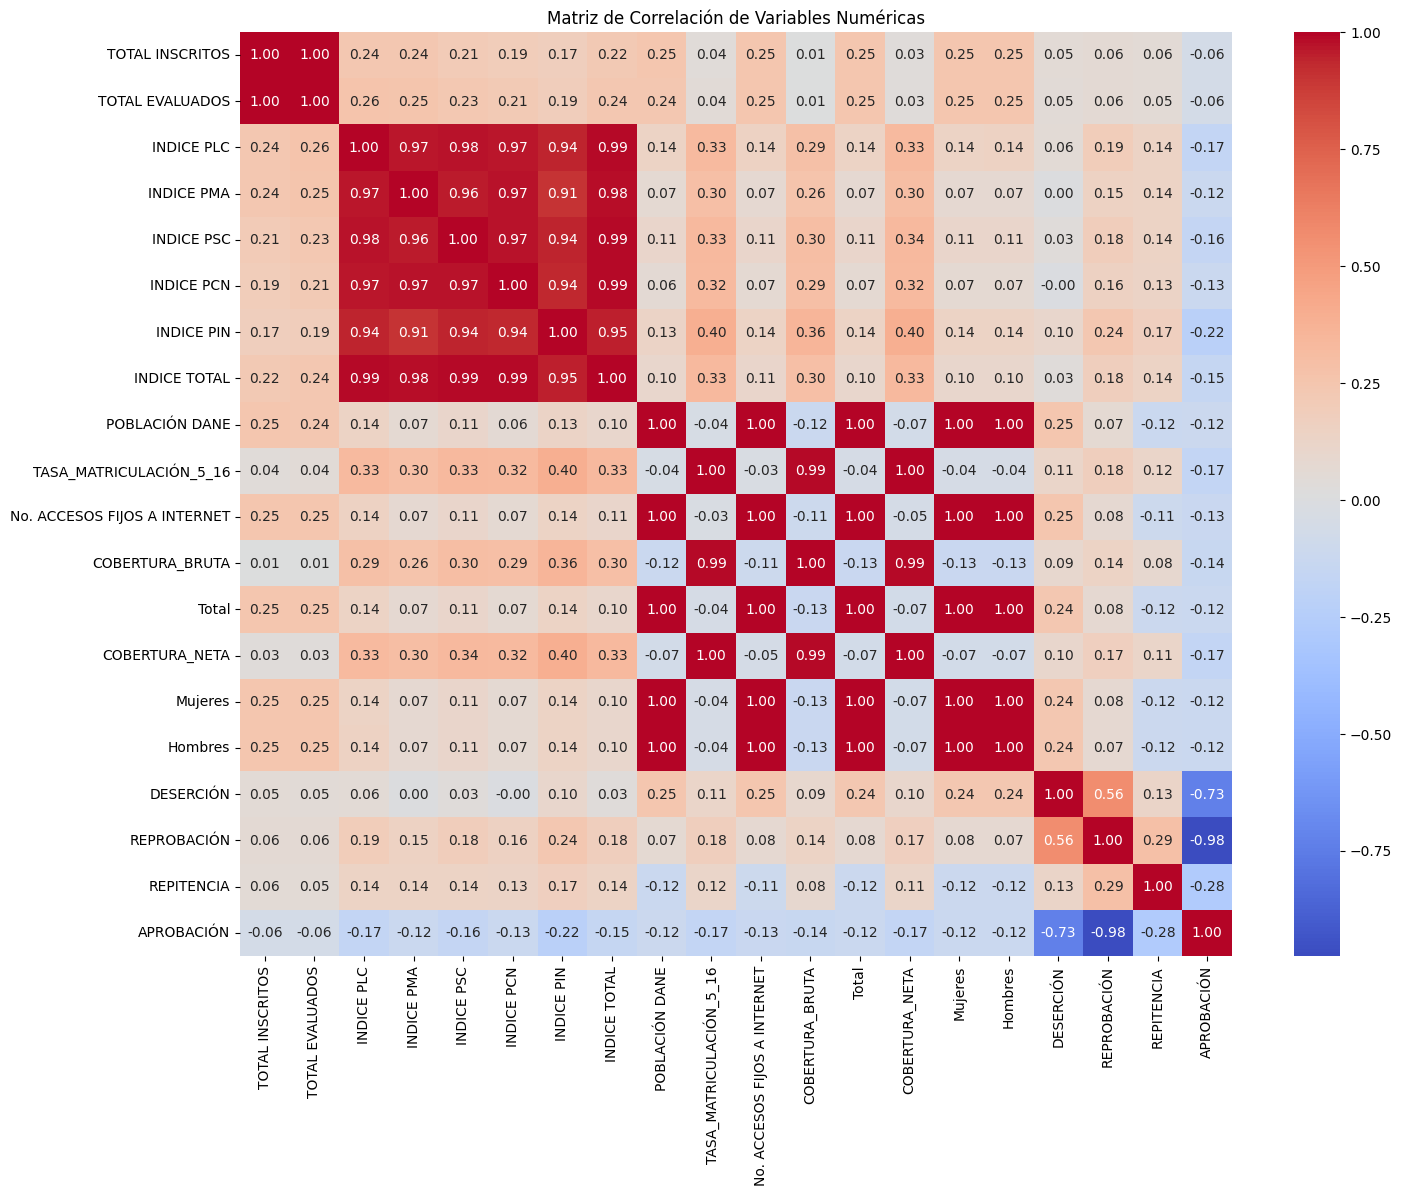

In [ ]:
import numpy as np

# Filtrar solo columnas numéricas
numeric_df = base.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# Visualizar con heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


In [ ]:
import pandas as pd
# Lista de columnas a eliminar por alta correlación
columnas_a_eliminar = [
    # Índices ICFES
    'INDICE PLC', 'INDICE PMA', 'INDICE PSC', 'INDICE PCN', 'INDICE PIN',

    # Población
    'Mujeres', 'Hombres', 'Total',

    # Educación
    'TASA_MATRICULACIÓN_5_16', 'COBERTURA_BRUTA',

]

# Verifica qué columnas están realmente presentes en el DataFrame
columnas_existentes = [col for col in columnas_a_eliminar if col in base.columns]

# Eliminar columnas del DataFrame
base_reducido = base.drop(columns=columnas_existentes)
columnas_decimales = base_reducido.select_dtypes(include='float').columns
for col in columnas_decimales:
  base_reducido[col] = base_reducido[col].round(2)
# Mostrar resultados
print(f"Tamaño original del DataFrame: {base.shape}")
print(f"Tamaño después de eliminar columnas redundantes: {base_reducido.shape}")
print(f"Columnas eliminadas: {columnas_existentes}")

# (Opcional) Guardar el nuevo DataFrame limpio
base_reducido.to_csv("base_reducida.csv", index=False)
print("Archivo 'base_reducida.csv' guardado correctamente.")


Tamaño original del DataFrame: (3385, 26)
Tamaño después de eliminar columnas redundantes: (3385, 16)
Columnas eliminadas: ['INDICE PLC', 'INDICE PMA', 'INDICE PSC', 'INDICE PCN', 'INDICE PIN', 'Mujeres', 'Hombres', 'Total', 'TASA_MATRICULACIÓN_5_16', 'COBERTURA_BRUTA']
Archivo 'base_reducida.csv' guardado correctamente.


In [ ]:
base_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3385 entries, 87 to 44693
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   PERIODO                       3385 non-null   category
 1   DEPARTAMENTO                  3385 non-null   object  
 2   Municipio                     3385 non-null   object  
 3   CODIGO PLANTEL EDUCATIVO      3385 non-null   string  
 4   GRADO                         3385 non-null   category
 5   TOTAL INSCRITOS               3385 non-null   float64 
 6   TOTAL EVALUADOS               3385 non-null   float64 
 7   CLASIFICACION                 3385 non-null   category
 8   INDICE TOTAL                  3385 non-null   float64 
 9   POBLACIÓN DANE                3385 non-null   int64   
 10  No. ACCESOS FIJOS A INTERNET  3385 non-null   int64   
 11  COBERTURA_NETA                3385 non-null   float64 
 12  DESERCIÓN                     3385 non-null   float

In [ ]:
columnas_decimales = base_reducido.select_dtypes(include='float').columns
for col in columnas_decimales:
  base_reducido[col] = base_reducido[col].round(2)

print(base_reducido.head())

    PERIODO DEPARTAMENTO Municipio CODIGO PLANTEL EDUCATIVO GRADO  \
87     2021    antioquia   granada             105313000016  11.0   
88     2021    antioquia   granada             205313000215  11.0   
89     2021    antioquia   granada             205313000517  11.0   
110    2021    antioquia    nariño             105483000347  11.0   
111    2021    antioquia    nariño             205483000392  11.0   

     TOTAL INSCRITOS  TOTAL EVALUADOS CLASIFICACION  INDICE TOTAL  \
87             271.0            267.0             B          0.67   
88              13.0             12.0             D          0.58   
89              30.0             30.0             C          0.65   
110             84.0             81.0             C          0.64   
111              3.0              3.0            SC          0.59   

     POBLACIÓN DANE  No. ACCESOS FIJOS A INTERNET  COBERTURA_NETA  DESERCIÓN  \
87            29451                          1884           90.62       3.89   
88        

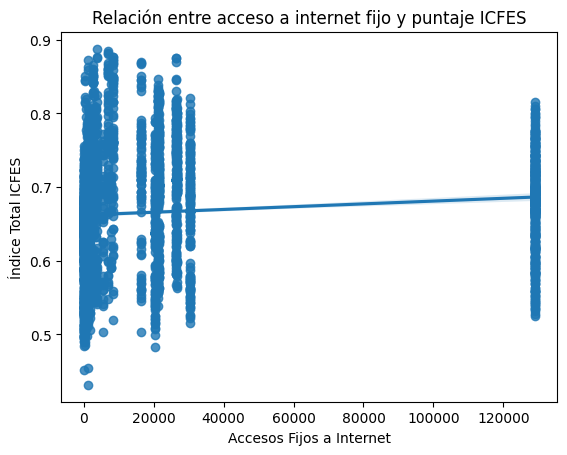

In [ ]:

# 📌 1. Relación entre acceso a internet fijo y puntajes ICFES
sns.regplot(data=base, x='No. ACCESOS FIJOS A INTERNET', y='INDICE TOTAL')
plt.title('Relación entre acceso a internet fijo y puntaje ICFES')
plt.xlabel('Accesos Fijos a Internet')
plt.ylabel('Índice Total ICFES')
plt.show()



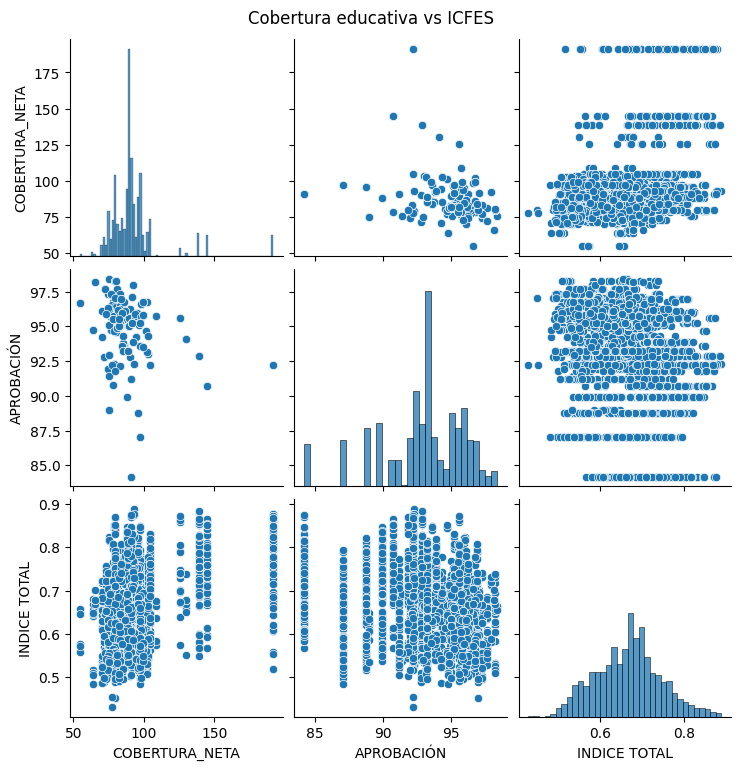

In [ ]:

# 📌 2. Impacto de matrícula y cobertura en ICFES
sns.pairplot(base, vars=['COBERTURA_NETA', 'APROBACIÓN', 'INDICE TOTAL'])
plt.suptitle('Cobertura educativa vs ICFES', y=1.02)
plt.show()



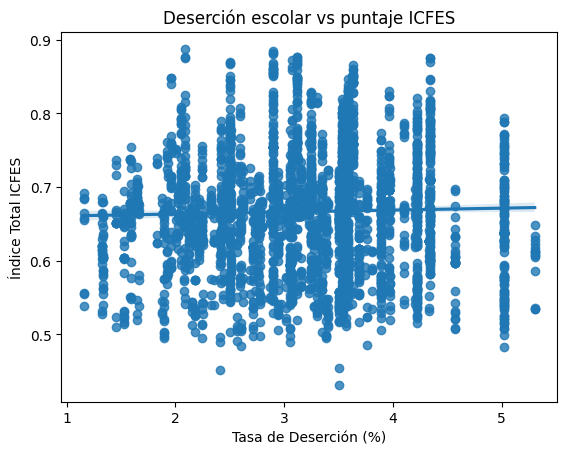

In [ ]:
# 📌 3. Correlación entre deserción y puntajes ICFES
sns.regplot(data=base, x='DESERCIÓN', y='INDICE TOTAL')
plt.title('Deserción escolar vs puntaje ICFES')
plt.xlabel('Tasa de Deserción (%)')
plt.ylabel('Índice Total ICFES')
plt.show()



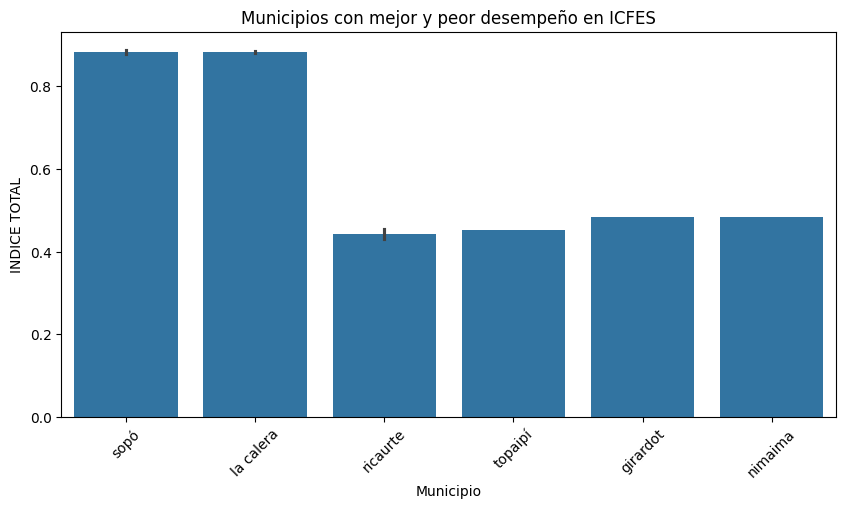

In [ ]:
# 📌 4. Mejores y peores municipios ICFES
mejores = base.sort_values('INDICE TOTAL', ascending=False).head(5)
peores = base.sort_values('INDICE TOTAL').head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x='Municipio', y='INDICE TOTAL', data=pd.concat([mejores, peores]))
plt.title('Municipios con mejor y peor desempeño en ICFES')
plt.xticks(rotation=45)
plt.show()



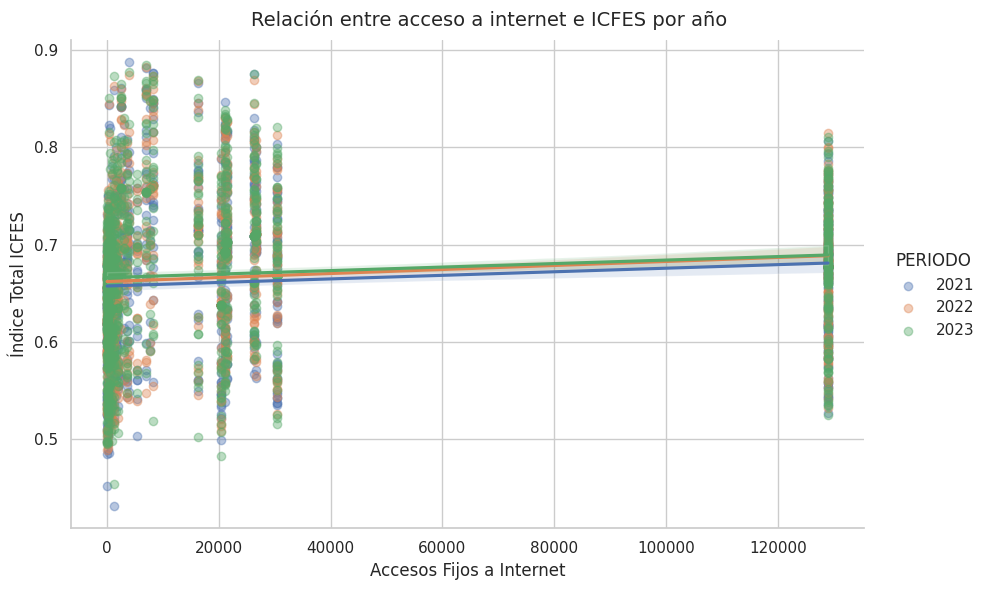

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Eliminar caracteres no imprimibles si los hubiera
df_icfes['PERIODO'] = df_icfes['PERIODO'].astype(str).str.replace(r'[\t\n\r]', '', regex=True)

# Establecer estilo visual
sns.set(style='whitegrid')

# Crear gráfico con lmplot
plot = sns.lmplot(
    data=df_icfes,
    x='No. ACCESOS FIJOS A INTERNET',
    y='INDICE TOTAL',
    hue='PERIODO',
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4}
)

# Ajustar elementos
plot.set_axis_labels('Accesos Fijos a Internet', 'Índice Total ICFES')
plot.fig.suptitle('Relación entre acceso a internet e ICFES por año', fontsize=14)
plot.tight_layout()
plot.fig.subplots_adjust(top=0.93)  # Deja espacio para el título

# Guardar como imagen
plot.savefig("relacion_internet_icfes_por_anio.png")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
!pip install python-docx
from docx import Document
from docx.shared import Inches

# Crear documento Word
doc = Document()
doc.add_heading('Diccionario de Datos - Base Reducida ICFES', 0)

# Descripciones de las columnas
columnas = [
    ("TOTAL INSCRITOS", "Número total de estudiantes inscritos para la prueba ICFES 11 en el municipio."),
    ("TOTAL EVALUADOS", "Número total de estudiantes que finalmente presentaron la prueba ICFES 11."),
    ("INDICE TOTAL", "Índice global de desempeño en la prueba ICFES 11 (promedio ponderado de las áreas evaluadas)."),
    ("No. ACCESOS FIJOS A INTERNET", "Número de conexiones fijas a internet reportadas en el municipio. Indicador de conectividad digital."),
    ("POBLACIÓN DANE", "Población total proyectada del municipio según el DANE."),
    ("COBERTURA_NETA", "Porcentaje de estudiantes matriculados en el nivel educativo adecuado para su edad."),
    ("APROBACIÓN", "Porcentaje de estudiantes que aprobaron el año escolar en el municipio."),
    ("REPITENCIA", "Porcentaje de estudiantes que repitieron el año escolar."),
    ("DESERCIÓN", "Porcentaje de estudiantes que abandonaron el sistema educativo en el año."),
    ("DEPARTAMENTO", "Nombre del departamento al que pertenece el municipio (en este caso, debe ser siempre “Cundinamarca”)."),
    ("Municipio", "Nombre del municipio al que pertenecen los datos.")
]

# Crear tabla
table = doc.add_table(rows=1, cols=2)
table.style = 'Light Grid'
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Columna'
hdr_cells[1].text = 'Descripción'

# Agregar datos
for col, desc in columnas:
    row_cells = table.add_row().cells
    row_cells[0].text = col
    row_cells[1].text = desc

# Guardar documento
file_path = "/mnt/data/Diccionario_Datos_ICFES.docx"

# Ensure the directory exists
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' created.")

doc.save(file_path)

print(f"Archivo '{file_path}' guardado correctamente.")
print(file_path)

Directory '/mnt/data' created.
Archivo '/mnt/data/Diccionario_Datos_ICFES.docx' guardado correctamente.
/mnt/data/Diccionario_Datos_ICFES.docx
